In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Read Dataset

In [3]:
X = np.load('mnist/x_train.npy')
y = np.load('mnist/y_train.npy')
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

## A. Fit GMM

In [4]:
X_binary = np.concatenate([X[y==0], X[y==1]])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_binary)


gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X_pca)

GaussianMixture(n_components=2, random_state=42)

## B. Distance Between The Means

In [5]:
mean1 = gmm.means_[0]
mean2 = gmm.means_[1]

distance = np.linalg.norm(mean1 - mean2)
print(f"Distance between means:{distance: .2f}")

Distance between means: 1909.64


## C. Visualizing Components Means

In [6]:
def plot_image(img, img_rows=28, img_cols=28, title=''):
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img,cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.title(title)

In [7]:
mean1_inv = pca.inverse_transform(mean1)
mean2_inv = pca.inverse_transform(mean2)

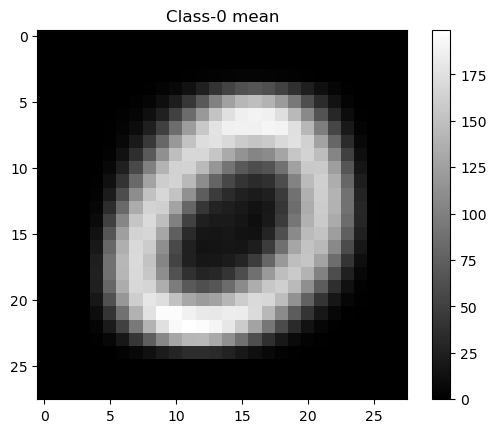

In [8]:
plot_image(mean1_inv, title="Class-0 mean")
plt.savefig('assets/Q6_zero_mean.png')

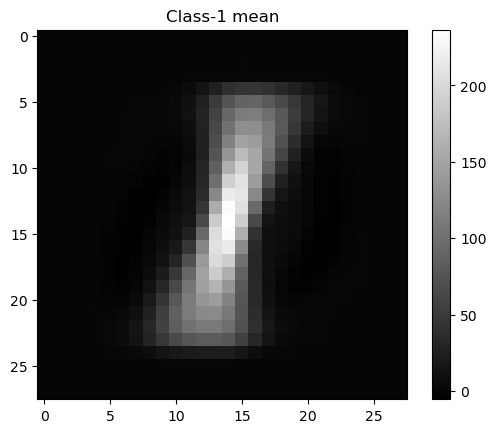

In [9]:
plot_image(mean2_inv, title="Class-1 mean")
plt.savefig('assets/Q6_one_mean.png')

## D. Close Images to Decision Boundary

In [48]:
probs = gmm.predict_proba(X_pca)[:, 0]
probs = np.abs(probs - 0.5)
probs = np.array([[prob, i] for i, prob in zip(range(probs.shape[0]), probs)])

In [49]:
probs = np.array(sorted(probs, key=lambda x: x[0]))

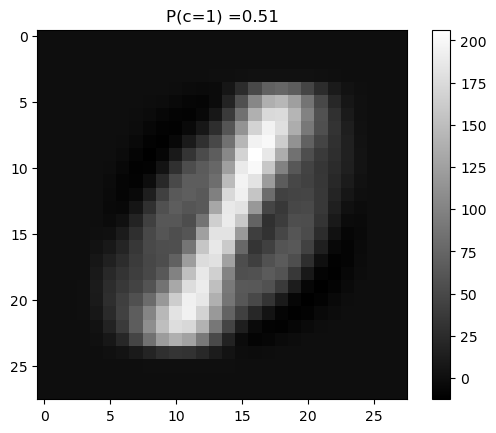

In [61]:
plot_image(
    pca.inverse_transform(X_pca[int(probs[0, 1])]), 
    title=f'P(c=1) ={0.5 + probs[0, 0]:.2f}'
    )
plt.savefig('assets/Q6_DB1.png')

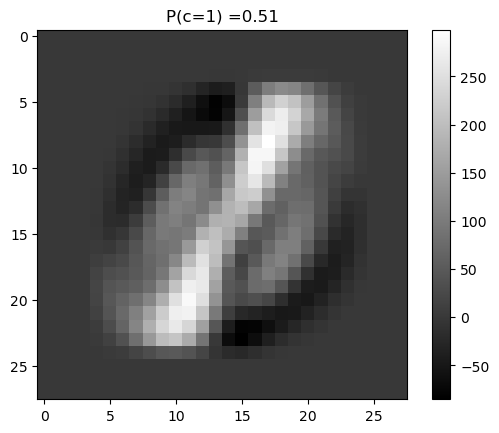

In [62]:
plot_image(
    pca.inverse_transform(X_pca[int(probs[1, 1])]), 
    title=f'P(c=1) ={0.5 + probs[1, 0]:.2f}'
    )
plt.savefig('assets/Q6_DB2.png')

## E. Similarity Between Classes

In [69]:
def gmm_distance(X, y, label1, label2):
    X = np.concatenate([X[y==label1], X[y==label2]])
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    
    gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
    gmm.fit(X_pca)

    mean1 = gmm.means_[0]
    mean2 = gmm.means_[1]

    distance = np.linalg.norm(mean1 - mean2)
    
    mean1_inv = pca.inverse_transform(mean1)
    mean2_inv = pca.inverse_transform(mean2)
    
    return distance, mean1_inv, mean2_inv

In [70]:
distances = []
labels = []
for label1 in range(10):
    for label2 in range(label1 + 1, 10):
        distances.append(gmm_distance(X, y, label1, label2)[0])
        labels.append((label1, label2))

### Min distance

In [71]:
max_labels = labels[np.argmax(distances)]
_, mean1_inv, mean2_inv = gmm_distance(X, y, *max_labels)
print("Max distance:", max_labels)

Max distance: (0, 1)


### Max distance

In [72]:
min_labels = labels[np.argmin(distances)]
_, mean1_inv, mean2_inv = gmm_distance(X, y, *min_labels)
print("Min distance:", min_labels)

Min distance: (8, 9)


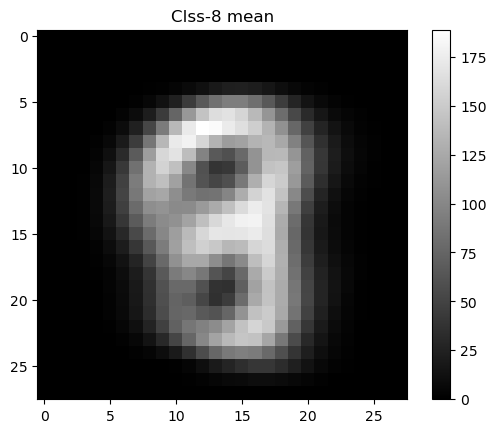

In [73]:
plot_image(mean1_inv, title='Clss-8 mean')
plt.savefig('assets/Q6_eight_mean.png')

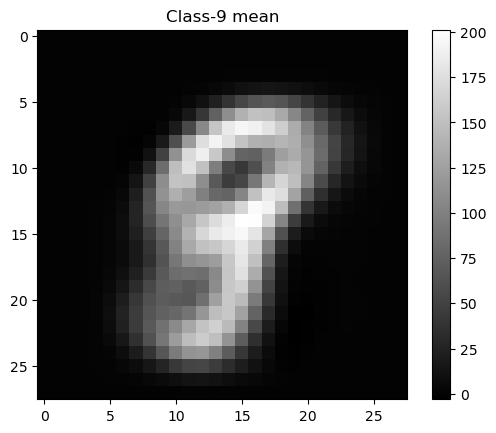

In [74]:
plot_image(mean2_inv, title='Class-9 mean')
plt.savefig('assets/Q6_nine_mean.png')